# `clust-learn` - Module 3: Clustering 聚类

This guide shows how to use the `clustering` module of the `clust-learn` package to compute and explain clusters.

本指南展示了如何使用clust-learn包中的clustering模块来计算和解释聚类。

## 0. Setup

In [47]:
import numpy as np
import pandas as pd

from clearn.clustering import Clustering
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

## 1. Data loading

DataFrame with extracted dimensions.

提取降维后的数据框。

In [48]:
df = pd.read_csv('data_MAC/data_澳门_modified_preprocessed_dim_red_output.csv')
print(df.shape)
df.head()

(4109, 19)


dim_01  dim_02  dim_03  dim_04  dim_05  dim_06  dim_07  dim_08  dim_09  \
0  0.8159  1.2642 -0.0765  0.1007  0.6011  1.0903  0.9998  0.9829  0.6380   
1  1.2261 -0.4632 -0.0785  0.0012  0.2510  1.1093  1.0117  0.8656  1.3279   
2  0.6715  3.1807  0.0092  2.5135 -0.7615  1.0088  1.0961  0.8064  1.1555   
3  0.2501 -1.0691 -0.0541 -1.6349 -0.9765  0.9964  1.0429  0.7749  0.7331   
4  0.1228  0.0100 -0.1109  0.9318  0.1868  1.0923  1.0114  0.8440  0.9782   

   dim_10  dim_11  dim_12  dim_13  dim_14  dim_15  dim_16  dim_17  dim_18  \
0 -0.2878  0.1420 -0.1442  0.0586  0.0155  0.0462 -0.0489  0.0561 -0.1320   
1 -1.0286  0.1497 -0.1418  0.0267 -0.0046  0.0393 -0.0557  0.0690 -0.0945   
2  1.2930  0.1105 -0.1424  0.0700  0.0558  0.0513 -0.0672  0.0321 -0.1737   
3 -1.1291  0.1831 -0.1367 -0.0239 -0.0527  0.0270 -0.0379  0.0626 -0.0490   
4  0.7468  0.1566 -0.1475  0.0009 -0.0198  0.0292 -0.0563  0.0632 -0.0697   

   dim_19  
0  0.1879  
1  0.1883  
2  0.1778  
3  0.2067  
4  0.1845

DataFrame with original variables. This will later be used for results interpretation.

包含原始变量的数据框。这将在稍后用于结果解释。


In [49]:
df_original = pd.read_csv('data_MAC/data_澳门_modified_preprocess_ouput.csv')
print(df_original.shape)
df_original.head()

(4109, 276)


ASDAGE   ASRREA   ASRLIT   ASRINF   ASRIIE   ASRRSI  ASBGSEC  ASBGSSB  \
0  9.4200 587.7808 542.6885 561.8733 559.3644 572.0576   8.7788   9.1530   
1 10.4200 576.6042 557.3837 612.5712 553.7443 594.7217  10.1209   9.8208   
2 10.2500 566.2305 527.0627 573.7171 555.5135 571.1333  11.6188  12.8526   
3  9.7500 553.6858 547.5363 580.1766 557.4199 525.1626   8.5582   6.9364   
4 10.1700 548.5204 537.3576 550.4542 529.2060 554.1755   9.2502  12.8526   

   ASBGSB  ASBGERL  ASBGDRL  ASBGSLR  ASBGSCR  ASBGHRL  ASBHSES  ASBHELA  \
0  8.1840   8.5445  10.9865  11.3015  10.2898  10.8926  10.7299   9.7989   
1  7.9032  10.0428   9.8975   9.1707   7.8416  10.2224  10.3472   7.6184   
2 10.2869  13.3345  13.1594   9.8629  10.9057   9.9153   9.6545  10.7707   
3  9.8527   8.5445   7.8660   8.7748   8.4282   8.5479   7.9290   8.0567   
4  9.8527   9.5635  11.5010  10.1414  10.2898   9.9153  10.7299   9.7989   

   ASBHENA  ASBHELN  ASBHELT  ASBHPCS  ASBHPLR   ACBG09  ACBG15  ACBG16  \
0  10.5003  10.1163  10.8019  12.1320   9.5845 300.0000 17.0000 17.0000   
1   9.6243   8.5751  11.1839  10.1060  10.1418 300.0000 17.0000 17.0000   
2  13.2059  11.8249  12.7988  12.1320   8.6708 300.0000 17.0000 17.0000   
3   9.2144   8.5751   9.4223   9.5249   8.4594 300.0000 17.0000 17.0000   
4   9.2144   9.4343  10.4454   9.5249   8.0424 300.0000 17.0000 17.0000   

   ACBGRRS  ACBGEAS  ACBGDAS  ACDGTIHY  ATBG01  ATBR01A  ATBR01B  ATBR02A  \
0   9.2404  11.3257  12.9615  910.0000 32.0000  34.0000  34.0000   1.0000   
1   9.2404  11.3257  12.9615  910.0000 32.0000  34.0000  34.0000   1.0000   
2   9.2404  11.3257  12.9615  910.0000 32.0000  34.0000  34.0000   1.0000   
3   9.2404  11.3257  12.9615  910.0000 32.0000  34.0000  34.0000   1.0000   
4   9.2404  11.3257  12.9615  910.0000 32.0000  34.0000  34.0000   1.0000   

   ATBR02B  ATBGEAS  ATBGSOS  ATBGTJS  ATBGSLI  ATDGLIHY  ATDGRIHY  ITSEX  \
0   8.0000   9.4411  13.6815   8.6795  10.2793  182.0000   58.5000      1   
1   8.0000   9.4411  13.6815   8.6795  10.2793  182.0000   58.5000      1   
2   8.0000   9.4411  13.6815   8.6795  10.2793  182.0000   58.5000      1   
3   8.0000   9.4411  13.6815   8.6795  10.2793  182.0000   58.5000      1   
4   8.0000   9.4411  13.6815   8.6795  10.2793  182.0000   58.5000      1   

   ASRIBM  ASBG03  ASBG05A  ASBG05B  ASBG05E  ASBG05F  ASBG05G  ASBG05H  \
0       4       2        1        1        2        2        1        1   
1       4       1        1        2        1        1        1        2   
2       4       3        1        1        1        1        1        1   
3       4       1        1        2        1        2        1        2   
4       3       1        1        1        2        2        1        2   

   ASBG05I  ASBG05J  ASBG05K  ASBG06  ASBG07A  ASBG07B  ASBG08A  ASBG08B  \
0        2        2        2       3        3        3        2        2   
1        2        2        2       5        2        3        2        2   
2        1        2        1       5        4        3        2        2   
3        2        2        2       5        3        1        1        1   
4        2        2        2       5        2        3        2        1   

   ASBG10F  ASBR03A  ASBR03B  ASBR03C  ASBR04  ASBR05  ASDGSEC  ASDGSSB  \
0        2        1        1        3       1       2        2        2   
1        1        2        1        3       2       4        2        1   
2        1        1        1        2       3       3        1        1   
3        3        2        2        2       4       1        2        3   
4        1        2        2        4       2       1        2        1   

   ASDGSB  ASDGERL  ASDGDRL  ASDGSLR  ASDGSCR  ASDG05S  ASBH02A  ASBH02B  \
0       2        2        2        1        1        3        1        1   
1       2        1        2        2        3        2        1        1   
2       1        1        1        2        1        2        1        1   
3       1        2        3        2        2    

We separate numerical and categorical variables from the original set of variables.

我们从原始变量集中分离数值变量和分类变量。


In [50]:
num_vars = ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']
cat_vars = ['ITSEX', 'ASRIBM', 'ASBG03', 'ASBG05A', 'ASBG05B', 'ASBG05E', 'ASBG05F', 'ASBG05G', 'ASBG05H', 'ASBG05I', 'ASBG05J', 'ASBG05K', 'ASBG06', 'ASBG07A', 'ASBG07B', 'ASBG08A', 'ASBG08B', 'ASBG10F', 'ASBR03A', 'ASBR03B', 'ASBR03C', 'ASBR04', 'ASBR05', 'ASDGSEC', 'ASDGSSB', 'ASDGSB', 'ASDGERL', 'ASDGDRL', 'ASDGSLR', 'ASDGSCR', 'ASDG05S', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH03B', 'ASBH03C', 'ASBH03D', 'ASBH03E', 'ASBH04', 'ASBH06', 'ASBH07F', 'ASBH09', 'ASBH14A', 'ASBH14B', 'ASBH14C', 'ASBH16', 'ASBH18AA', 'ASBH18AB', 'ASBH18BA', 'ASBH18BB', 'ASBH18CA', 'ASBH18CB', 'ASBH18DA', 'ASBH18DB', 'ASBH18EA', 'ASBH18EB', 'ASBH19', 'ASBH20A', 'ASBH20B', 'ASBH20C', 'ASBH21A', 'ASBH21B', 'ASBH21C', 'ASBH21D', 'ASBH22', 'ASDGHRL', 'ASDHSES', 'ASDHELA', 'ASDHENA', 'ASDHELN', 'ASDHELT', 'ASDHPCS', 'ASDHPLR', 'ASDHAPS', 'ASDHEDUP', 'ASDHOCCP', 'ACBG04', 'ACBG05A', 'ACBG05B', 'ACBG07A', 'ACBG07B', 'ACBG07C', 'ACBG08', 'ACBG13', 'ACBG14A', 'ACBG14B', 'ACBG14C', 'ACBG14D', 'ACBG14E', 'ACBG14F', 'ACBG14G', 'ACBG14H', 'ACBG14I', 'ACBG14J', 'ACBG14K', 'ACBG14L', 'ACBG14M', 'ACBG14N', 'ACBG17', 'ACBG18A', 'ACBG18B', 'ACBG18C', 'ACBG19', 'ACBG20', 'ACBG21A', 'ACBG21B', 'ACBG21C', 'ACBG21D', 'ACBG21E', 'ACBG21F', 'ACDGRRS', 'ACDGEAS', 'ACDGDAS', 'ACDGSBC', 'ATBG02', 'ATBG03', 'ATBG05AA', 'ATBG05AB', 'ATBG05AC', 'ATBG05AD', 'ATBG05BA', 'ATBG05BB', 'ATBG05BC', 'ATBG05BD', 'ATBG05BE', 'ATBG05BF', 'ATBG05BG', 'ATBG05BH', 'ATBG05BI', 'ATBG05BJ', 'ATBG05BK', 'ATBG06', 'ATBG07AA', 'ATBG07BA', 'ATBG07AB', 'ATBG07BB', 'ATBG07AC', 'ATBG07BC', 'ATBG07AD', 'ATBG07BD', 'ATBG07AE', 'ATBG07BE', 'ATBG07AF', 'ATBG07BF', 'ATBG07AG', 'ATBG07BG', 'ATBG08A', 'ATBG08B', 'ATBG08C', 'ATBG08D', 'ATBG08E', 'ATBG09A', 'ATBG09B', 'ATBG09C', 'ATBG09D', 'ATBR06A', 'ATBR06B', 'ATBR06C', 'ATBR06D', 'ATBR06E', 'ATBR07AA', 'ATBR07AB', 'ATBR07AC', 'ATBR07AD', 'ATBR07BA', 'ATBR07BB', 'ATBR07BC', 'ATBR07BD', 'ATBR08A', 'ATBR08B', 'ATBR08C', 'ATBR08D', 'ATBR08E', 'ATBR08F', 'ATBR08G', 'ATBR08H', 'ATBR09A', 'ATBR09B', 'ATBR09C', 'ATBR09D', 'ATBR09E', 'ATBR09F', 'ATBR09G', 'ATBR09H', 'ATBR09I', 'ATBR10A', 'ATBR10B', 'ATBR10C', 'ATBR10D', 'ATBR10E', 'ATBR10F', 'ATBR10G', 'ATBR10H', 'ATBR10I', 'ATBR10J', 'ATBR10K', 'ATBR10L', 'ATBR11A', 'ATBR11B', 'ATBR11C', 'ATBR11D', 'ATBR11E', 'ATBR12A', 'ATBR12BA', 'ATBR12BB', 'ATBR12BC', 'ATBR12BD', 'ATBR12C', 'ATBR12DA', 'ATBR12DB', 'ATBR12DC', 'ATBR12EA', 'ATBR12EB', 'ATBR12EC', 'ATBR12ED', 'ATBR12EE', 'ATBR13A', 'ATBR13B', 'ATBR13C', 'ATBR13D', 'ATBR13E', 'ATBR14', 'ATBR15', 'ATBR16', 'ATBR17A', 'ATBR17B', 'ATBR17C', 'ATBR18A', 'ATBR18B', 'ATBR18C', 'ATBR18D', 'ATBR18E', 'ATBR19', 'ATDGEAS', 'ATDGSOS', 'ATDGTJS', 'ATDGSLI']

We make a selection of the original variables for some visualizations.
我们选择了一些原始变量来进行可视化。


In [51]:
num_vars_sel= ['ASDAGE', 'ASRREA', 'ASRLIT', 'ASRINF', 'ASRIIE', 'ASRRSI', 'ASBGSEC', 
               'ASBGSSB', 'ASBGSB', 'ASBGERL', 'ASBGDRL', 'ASBGSLR', 'ASBGSCR', 'ASBGHRL', 'ASBHSES', 
               'ASBHELA', 'ASBHENA', 'ASBHELN', 'ASBHELT', 'ASBHPCS', 'ASBHPLR', 'ACBG09', 'ACBG15', 'ACBG16', 
               'ACBGRRS', 'ACBGEAS', 'ACBGDAS', 'ACDGTIHY', 'ATBG01', 'ATBR01A', 'ATBR01B', 'ATBR02A', 'ATBR02B', 
               'ATBGEAS', 'ATBGSOS', 'ATBGTJS', 'ATBGSLI', 'ATDGLIHY', 'ATDGRIHY']

## 1. Clustering computation 聚类计算


We compare k-means, agglomerative clustering with Ward's linkage, and Gaussian Mixture models. We don't normalize the data (`normalize=False`) because we're using the components extracted from the dimensionality reduction process.

我们比较了k-means、具有Ward链接的凝聚聚类以及高斯混合模型。我们没有对数据进行标准化（`normalize=False`），因为我们使用的是从降维过程中提取的成分。


In [52]:
km = KMeans(random_state=42)
ward = AgglomerativeClustering()
gmm = GaussianMixture()

In [53]:
# 创建三种聚类算法实例，并通过Clustering类封装数据。
# K均值适合球形簇，层次聚类适合层级结构，高斯混合模型适合复杂分布。
cl = Clustering(df, algorithms= [km, ward, gmm], normalize=False)

In [54]:
cl.df.describe()

dim_01    dim_02    dim_03    dim_04    dim_05    dim_06    dim_07  \
count 4109.0000 4109.0000 4109.0000 4109.0000 4109.0000 4109.0000 4109.0000   
mean     0.0000   -0.0000    0.0000    0.0000    0.0000    0.0000   -0.0000   
std      2.2199    1.7087    1.6653    1.5775    1.4528    1.4279    1.3745   
min     -9.1793   -8.3680   -4.8534   -5.8618   -4.3591   -2.4916   -5.9841   
25%     -1.3501   -1.0933   -1.0187   -1.1059   -0.9954   -1.0325   -0.7924   
50%      0.1600   -0.1469   -0.1550   -0.1163   -0.0789   -0.1663    0.2944   
75%      1.5906    0.9905    1.2776    0.9947    0.9397    0.5941    0.8728   
max      6.2074    7.8666    5.3974    5.4500    5.1421    7.2072    2.8338   

         dim_08    dim_09    dim_10    dim_11    dim_12    dim_13    dim_14  \
count 4109.0000 4109.0000 4109.0000 4109.0000 4109.0000 4109.0000 4109.0000   
mean    -0.0000   -0.0000    0.0000   -0.0000    0.0000   -0.0000   -0.0000   
std      1.3675    1.1828    1.1718    0.2943    0.2748    0.2262    0.2240   
min     -3.2462   -2.4387   -4.2795   -0.7174   -0.3430   -0.4509   -0.6027   
25%     -1.0409   -0.8305   -0.7649   -0.2115   -0.1603   -0.1669   -0.1278   
50%     -0.3118   -0.2020   -0.0795    0.0092   -0.0472   -0.0271   -0.0170   
75%      1.0989    0.7003    0.7222    0.1929    0.0692    0.1414    0.1166   
max      3.7083    4.7454    3.8368    0.8053    1.1745    0.6067    0.7087   

         dim_15    dim_16    dim_17    dim_18    dim_19  
count 4109.0000 4109.0000 4109.0000 4109.0000 4109.0000  
mean    -0.0000   -0.0000   -0.0000   -0.0000   -0.0000  
std      0.2057    0.1933    0.1898    0.1865    0.1855  
min     -0.6170   -0.4215   -0.6257   -0.4994   -0.7558  
25%     -0.0967   -0.1287   -0.0645   -0.1137   -0.0828  
50%     -0.0044   -0.0191    0.0318   -0.0187   -0.0018  
75%      0.0907    0.0985    0.1012    0.1133    0.1113  
max      0.7258    0.5953    1.1045    0.6105    0.7941

The code below computes the optimal number of clusters between 2 and 21 and adds the prefict `'STU'` (from the word student) to the cluster labels.

以下代码计算了在2到21之间的最优聚类数，并在聚类标签前添加了前缀'STU'（来自单词“student”）。

As performance metric teh default one is used (WSS or inertia - `metric='inertia'`).

作为性能指标，默认使用了WSS或惯性（metric='inertia'）。

In [55]:
# 在2到21个聚类范围内寻找最优聚类数，并为聚类标签添加前缀STU。
# 返回每个样本的聚类标签。
cl.compute_clusters(max_clusters = 21, prefix='STU')

array([0, 6, 0, ..., 2, 4, 4], dtype=int32)

In [56]:
# 在调用 plot_score_comparison 前转换标签类型
cl.df['cluster'] = cl.df['cluster'].astype(int)


In [57]:
# 存储三个聚类模型的评分或评估指标。
cl.scores_

{'KMeans(random_state=42)': [np.float64(99571.35278984784),
  np.float64(83174.47754853239),
  np.float64(76386.80581259544),
  np.float64(72412.24067732946),
  np.float64(69082.85423726641),
  np.float64(66364.83148969366),
  np.float64(63308.49009244258),
  np.float64(61021.675284364006),
  np.float64(59264.95143190311),
  np.float64(57814.95673448307),
  np.float64(56814.682522962394),
  np.float64(55502.8218122664),
  np.float64(53625.9195351747),
  np.float64(52475.97470925863),
  np.float64(51341.38935404644),
  np.float64(50617.09718752912),
  np.float64(49154.95469082343),
  np.float64(48539.39519378968),
  np.float64(47676.7822199633),
  np.float64(47153.32375712699),
  np.float64(46383.77973660583)],
 'AgglomerativeClustering()': [np.float64(99571.35278984784),
  np.float64(88750.99001700748),
  np.float64(83307.18948040382),
  np.float64(79115.48342754715),
  np.float64(75467.86642535115),
  np.float64(72061.54982732223),
  np.float64(69558.87403923496),
  np.float64(67548.2

In [58]:
# 存储聚类模型对数据点的聚类标签（cluster labels）。这些标签表示每个数据点被分配到的聚类编号。
cl.labels_

array([0, 6, 0, ..., 2, 4, 4], dtype=int32)

In [59]:
# 存储聚类模型的评估指标或度量方法。这些指标或方法用于衡量聚类结果的质量或描述聚类的特性。
# Inertia 表示所有数据点到其所属聚类中心的欧几里得距离的平方和
cl.metric_

'inertia'

In [60]:
# 最优配置（算法、聚类数、评分）
print("最优配置（算法、聚类数、评分）\n", cl.optimal_config_)

最优配置（算法、聚类数、评分）
 ('KMeans(random_state=42)', np.int64(7), np.float64(63308.49009244258))


## 2. Cluster performance 聚类性能可视化


The code below generates a bar plot with the number of observations per cluster.

以下代码生成了一个条形图，显示了每个聚类中的观测值数量。

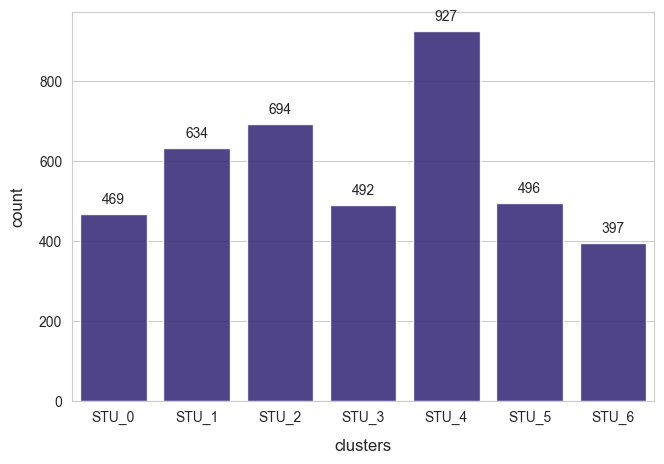

In [61]:
# 绘制每个聚类的样本数量的条形图。
cl.plot_clustercount() #output_path='PATH.jpg')


# # 绘制每个聚类的观测数  # 聚类结果可视化
# # Plot number of observations per cluster
# cl.plot_clustercount(output_path=os.path.join("img_MAC", "聚类数量分布图cluster_count.jpg"))
# print("已完成聚类数量分布图的生成。")

The code below generates a plot with the performance comparison between kmeans and aggomerative clustering.

以下代码生成了一个比较k-means聚类和凝聚聚类性能的图表。

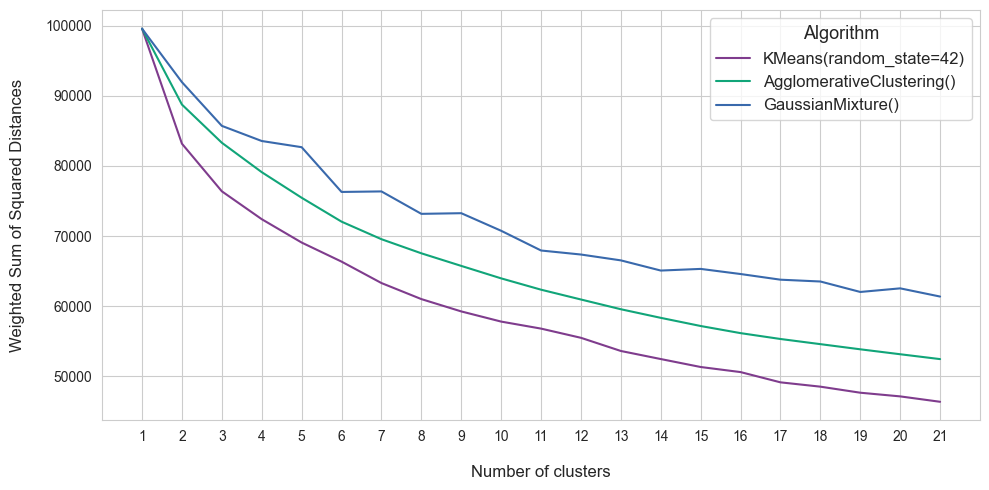

In [62]:
# # 横轴（Number of clusters）：表示聚类的数量，从 1 到 21。
# # 纵轴（Weighted Sum of Squared Distances）：表示加权平方距离（Weighted Sum of Squared Distances），值越小表示聚类效果越好
# cl.plot_score_comparison(output_path=os.path.join("img_MAC", "聚类算法性能的图表performance_comparison.jpg"))
# print("已完成聚类算法性能的图表的生成。")

cl.plot_score_comparison()

# 横轴（Number of clusters）：表示聚类的数量，从 1 到 21。
# 纵轴（Weighted Sum of Squared Distances）：表示加权平方距离（Weighted Sum of Squared Distances），值越小表示聚类效果越好

The code below plots the normalized WSS and difference curve used by the elbow method.

以下代码绘制了用于肘部法则的标准化WSS（总平方和）和差分曲线。

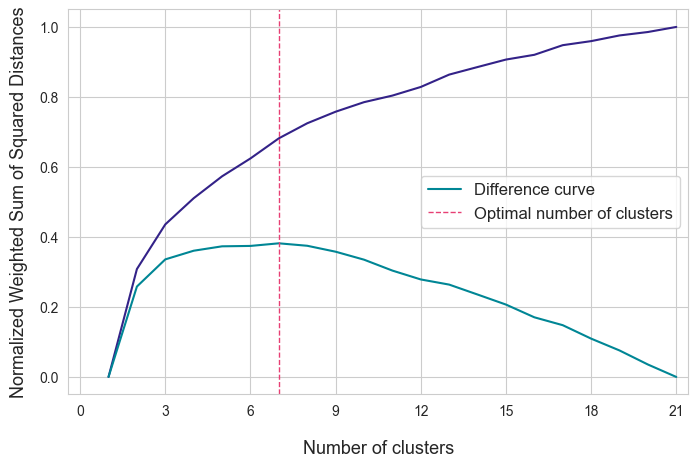

In [63]:
# 绘制肘部法则的标准化 WSS 和差分曲线。
cl.plot_optimal_components_normalized() #output_path='PATH.jpg')


# # 绘制肘部法则用于选择最优 k 的标准化 WSS 曲线  # 最优聚类数选择曲线
# # Plot normalized WSS curve for optimal k selection
# cl.plot_optimal_components_normalized(output_path=os.path.join("img_MAC", "最优聚类数选择曲线clustering_elbow_curve.jpg"))
# print("已完成最优聚类数选择曲线的生成。")

## 3. Analysis of clusters 聚类分析

### 3.1. Descriptive statistics by cluster 按聚类的描述性统计

#### 3.1.1. Internal variables 内部变量:降维之后的

'Mean', 'Std', 'Median', 'Mode'  

均值、标准差、中位数和众数

In [64]:
# Internal variables 内部变量
# 查看指定内部变量（如 dim_01 和 dim_07）的均值。
cl.describe_clusters(variables=['dim_01', 'dim_07'], statistics='mean')

cluster  dim_01  dim_07
             mean    mean
0       0  0.8992 -0.0987
1       1 -0.9706  0.4052
2       2 -3.2519 -0.3085
3       3  1.7977  0.8667
4       4  0.9634 -0.3517
5       5  0.0731  0.5775
6       6  1.6037 -0.9657

In [65]:
# 查看全部内部变量描述性统计
cl.describe_clusters()

cluster  dim_01                 dim_02                 dim_03          \
             mean  median    std    mean  median    std    mean  median   
0       0  0.8992  0.8674 1.4261  2.4519  2.1691 1.4622  0.0829 -0.0850   
1       1 -0.9706 -0.8804 1.2699 -0.5333 -0.5169 1.3224  1.5312  1.5510   
2       2 -3.2519 -2.9790 1.5158 -0.3708 -0.3970 1.4948 -0.8036 -0.6336   
3       3  1.7977  1.8246 1.4213  0.5446  0.5188 1.4704  2.0336  2.0337   
4       4  0.9634  0.8793 1.3155 -0.9163 -0.7679 1.2084 -0.5423 -0.4935   
5       5  0.0731 -0.0652 1.5520 -0.0308 -0.0174 1.3976 -2.1188 -2.0771   
6       6  1.6037  1.7109 1.6688  0.1065  0.0279 1.5351  0.2546  0.3817   

          dim_04                 dim_05                 dim_06                 \
     std    mean  median    std    mean  median    std    mean  median    std   
0 1.2676  0.8028  0.6800 1.5604  0.2163  0.2105 1.3404 -0.0599 -0.0674 1.1244   
1 0.9587 -0.2718 -0.3467 1.5720 -0.2993 -0.1814 1.4234  0.4143  0.4971 0.9761   
2 1.1728 -0.7966 -0.8822 1.4165 -0.5661 -0.6258 1.1505 -0.6657 -0.8230 1.0181   
3 0.9513  0.8190  0.6674 1.5244  1.6765  1.7239 1.2394  0.1805  0.1582 0.6032   
4 1.0836 -0.0363 -0.1803 1.4216 -0.5632 -0.5816 1.1661 -0.5013 -0.5648 0.9507   
5 0.7972 -0.4458 -0.4445 1.3020 -0.0476 -0.0913 1.2838 -1.0752 -1.1982 0.6389   
6 1.3867  0.5052  0.4694 1.5538  0.5090  0.3647 1.3468  2.8631  2.6967 1.3764   

   dim_07                 dim_08                 dim_09                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.0987  0.1884 1.1154 -0.4253 -0.7077 1.0096 -0.2059 -0.3924 1.0637   
1  0.4052  0.5218 1.1127 -0.0044 -0.1401 1.0091 -0.3969 -0.4765 0.9931   
2 -0.3085 -0.3337 1.2714 -0.8205 -0.9562 1.0926 -0.1317 -0.2824 1.0994   
3  0.8667  0.6801 1.4261  0.8491  0.8402 0.7604  0.6518  0.7062 1.4579   
4 -0.3517 -0.3025 1.2955 -1.0294 -1.0344 0.8268  0.2629 -0.0152 1.2647   
5  0.5775  0.7936 0.7992  1.4274  1.6392 0.8802 -0.5750 -0.5146 0.7279   
6 -0.9657 -0.6232 1.7489  1.5120  1.4783 1.2565  0.4041  0.2513 0.9204   

   dim_10                 dim_11                 dim_12                 \
     mean  median    std    mean  median    std    mean  median    std   
0  0.1690 -0.0134 1.1527  0.0105  0.0129 0.2787 -0.0747 -0.0816 0.1434   
1  0.0580  0.0022 1.2011 -0.1648 -0.1713 0.2356 -0.0970 -0.1378 0.1528   
2 -0.2929 -0.4019 1.1419  0.1635  0.1538 0.2355 -0.0059 -0.0849 0.2617   
3  0.3403  0.2344 1.1459 -0.2330 -0.2833 0.1817  0.0349  0.0925 0.1610   
4 -0.0772 -0.1736 1.1376  0.1070  0.1093 0.2804 -0.0680 -0.0948 0.1134   
5 -0.0680 -0.1307 1.0967  0.1452  0.0863 0.2021  0.3700  0.1081 0.5007   
6  0.0631  0.0577 1.2533 -0.1775 -0.1475 0.3197 -0.0934 -0.0679 0.1095   

   dim_13                 dim_14                 dim_15                 \
     mean  median    std    mean  median    std    mean  median    std   
0  0.0051 -0.0540 0.2378  0.0061  0.0097 0.2074 -0.0209  0.0014 0.1814   
1 -0.0370 -0.1213 0.2540 -0.0026 -0.0070 0.2623 -0.0455 -0.0427 0.2313   
2 -0.0494 -0.0609 0.1831 -0.0429 -0.0369 0.1506 -0.0091 -0.0084 0.1412   
3  0.1262  0.1121 0.1929  0.2158  0.1688 0.2760  0.1192  0.0880 0.3426   
4 -0.0383 -0.0419 0.1836 -0.0618 -0.0492 0.1656 -0.0078  0.0074 0.1436   
5  0.0467  0.0736 0.2792 -0.0832 -0.1027 0.1882  0.0138 -0.0224 0.2009   
6  0.0141  0.0267 0.2168  0.0526  0.0788 0.1893 -0.0336 -0.0649 0.1102   

   dim_16                 dim_17                 dim_18                 \
     mean  median    std    mean  median    std    mean  median    std   
0 -0.0305 -0.0320 0.1918 -0.0013  0.0257 0.1893 -0.0353 -0.0488 0.2020   
1  0.0198  0.0017 0.1693  0.0432  0.0690 0.1406 -0.0050 -0.0129 0.1862   
2  0.0065 -0.0065 0.1971 -0.0008  0.0141 0.1826  0.0542  0.0203 0.1662   
3 -0.0266 -0.0406 0.1248  0.0339  0.0303 0.1114 -0.0921 -0.0722 0.1196   
4 -0.0250 -0.0134 0.2036  0.0313  0.0297 0.1920  0.0723  0.0405 0.1757   
5  0.0632 -0.0542 0.2545 -0.1892 -0.1859 0.2517 -0.0556 -0.0637 0.1531   
6  

#### 3.1.2. External variables 外部变量：原始变量

In [66]:
# External variables - We use (some of) the original variables
# 外部变量 - 我们使用（部分）原始变量。
# 外部变量的描述性统计
cl.describe_clusters(df_original[num_vars], variables=num_vars, statistics='mean')

cluster ASDAGE   ASRREA   ASRLIT   ASRINF   ASRIIE   ASRRSI ASBGSEC ASBGSSB  \
            mean     mean     mean     mean     mean     mean    mean    mean   
0       0 9.8836 565.5362 554.9970 580.6998 561.4482 574.8146  9.7310 10.2632   
1       1 9.8224 516.5584 505.3155 529.7159 514.2749 520.3197  9.1234  9.3661   
2       2 9.8329 454.0874 443.3972 464.5586 452.9359 453.7168  8.9004  8.8607   
3       3 9.9364 591.2427 579.2503 604.6307 586.8241 600.4955  9.8178 10.4706   
4       4 9.9862 568.3387 556.5156 580.7627 564.8690 576.9032  9.2412  9.7202   
5       5 9.8014 544.6417 532.9171 557.1896 541.1336 550.7494  9.2024  9.0647   
6       6 9.9577 586.0275 573.8949 600.2359 581.8958 593.3100  9.7579 10.2387   

   ASBGSB ASBGERL ASBGDRL ASBGSLR ASBGSCR ASBGHRL ASBHSES ASBHELA ASBHENA  \
     mean    mean    mean    mean    mean    mean    mean    mean    mean   
0 10.0208 10.1808 10.1931 10.5522  9.7181 10.5141 10.4005 10.5309 11.8890   
1  9.6659  9.5364 10.2770  9.4700  8.4438  9.8541  9.5851  8.2638  9.3247   
2  9.1631  8.9779  9.9616  8.8574  7.9415  9.3824  9.1634  8.3356  9.4908   
3 10.0722 10.1175 10.5685 10.4162  9.8087 11.8063 11.7774  9.1510 10.1590   
4  9.7599  9.3794  9.8366  9.6613  9.1724  9.4931  9.1947  8.0127  8.8863   
5  9.6479  8.9425 10.1896  9.3553  8.9370 10.1640 10.0365  8.6740  9.7248   
6  9.9929  9.7239 10.1088 10.1751  9.3552 10.7672 10.6436  8.8051  9.7535   

  ASBHELN ASBHELT ASBHPCS ASBHPLR   ACBG09  ACBG15  ACBG16 ACBGRRS ACBGEAS  \
     mean    mean    mean    mean     mean    mean    mean    mean    mean   
0 11.1428 11.6344 11.1244 10.1208 125.8635 13.8337 10.4584  7.3581  9.5278   
1  8.7155 10.0638 10.3257  8.8626 163.3233 19.1483 12.0079  7.6468 10.3038   
2  8.8345  9.7367 10.1859  8.8353  97.5980  7.9251  7.1066  7.1681  8.9868   
3  9.5703 11.0067 10.7748  9.5586 188.1972 18.8008 11.0976  6.3903 12.9592   
4  8.3748 10.3825 10.4480  8.7538  85.7368  9.1392  8.2179  6.8700  8.8781   
5  9.1293 10.4894 10.0941  9.0038 243.0161  3.6774  3.5806  7.5071 10.5689   
6  9.1995 10.7197 10.7093  9.3733 209.6146 31.1990 28.1511  7.8324 11.8983   

  ACBGDAS  ACDGTIHY  ATBG01 ATBR01A ATBR01B ATBR02A ATBR02B ATBGEAS ATBGSOS  \
     mean      mean    mean    mean    mean    mean    mean    mean    mean   
0 11.0482  901.3271 12.4627 32.0256 31.9190  1.7420  3.3284  9.7875 11.6962   
1 12.2609  912.8166 10.4748 33.4148 33.3533  0.9811  2.2461 11.3182 12.8819   
2 10.4024  898.6148 12.8055 31.0720 31.2032  2.3300  4.3948  8.8749 10.6679   
3 12.7700  887.6880 14.8516 36.6443 33.3923  0.2114  1.1016 12.1749 13.2989   
4 10.5376  896.8692 14.9137 31.0539 31.0399  2.5609  4.7465  9.1732 10.8949   
5 10.4261  911.0983 11.4234 33.5383 33.4960  1.4798  3.0665  7.5574  9.2031   
6 10.5136 1047.8220 15.8640 31.1587 30.4307  3.8791  2.7330 10.6715 11.8175   

  ATBGTJS ATBGSLI ATDGLIHY ATDGRIHY  
     mean    mean     mean     mean  
0 10.0334 10.2906 186.0550  84.0631  
1 11.7930 10.1750 217.5517 103.1861  
2  9.3872  9.7656 159.3783  66.5810  
3 11.4258 11.0140 194.5260 130.6523  
4  9.8510  9.8632 179.4103  75.9604  
5  5.6823  8.7922 159.7467  68.4453  
6  9.8649 10.1525 181.4627 179.5434

In [67]:
# Use the original variables - Some of them
# 使用原始变量 - 其中一部分。

# 分类变量的分布

# ASDHSES	HOME SOCIOECONOMIC STATUS/IDX	家庭社会经济地位/指数
# 比较单一原始分类变量在各聚类中的分布
# Comparison of original categorical variable distribution by cluster
print(cl.describe_clusters_cat(df_original['ASDHSES'], cat_name='ASDHSES', normalize=True))

cl.describe_clusters_cat(df_original['ASDHSES'], cat_name='ASDHSES', normalize=True).to_csv('data_MAC/data_澳门_modified_比较单一原始分类变量ASDHSES在各聚类中的分布.csv', index=False)
print("已完成，比较单一原始分类变量ASDHSES在各聚类中的分布，结果保存。")


ASDHSES       1      2      3
Clusters                     
STU_0    0.3028 0.6098 0.0874
STU_1    0.1656 0.5804 0.2539
STU_2    0.0908 0.5576 0.3516
STU_3    0.7215 0.2703 0.0081
STU_4    0.0917 0.5674 0.3409
STU_5    0.2681 0.5524 0.1794
STU_6    0.3778 0.5642 0.0579
已完成，比较单一原始分类变量ASDHSES在各聚类中的分布，结果保存。


已完成单一原始分类变量在各聚类中的分布的生成。


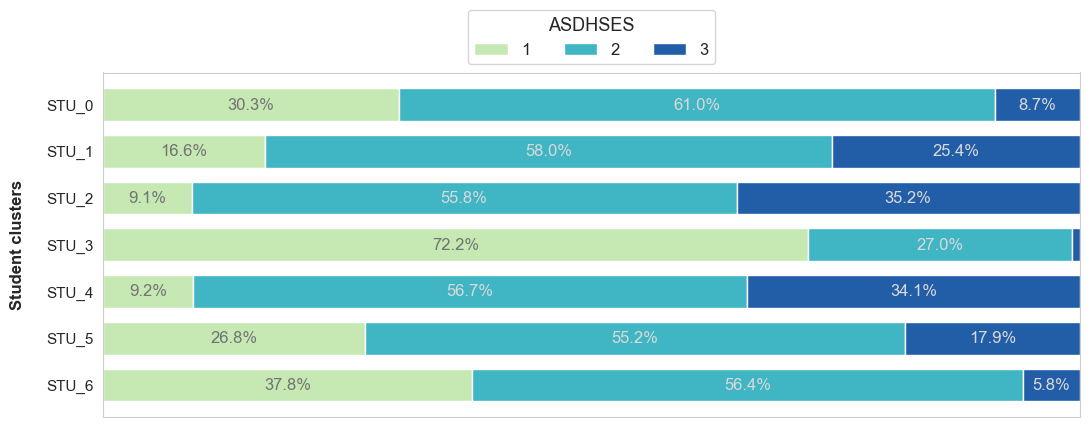

In [68]:
# 单一原始分类变量在各聚类中的分布
cl.plot_cat_distribution_by_cluster(df_original['ASDHSES'], cat_label='ASDHSES', cluster_label='Student clusters')
# output_path=os.path.join("img_MAC", "单一原始分类变量在各聚类中的分布clustering_cat_comparison.jpg"))
print("已完成单一原始分类变量在各聚类中的分布的生成。")

In [69]:
# ITSEX	Sex of Students	学生性别  1: Girl; 2: Boy
cl.describe_clusters_cat(df_original['ITSEX'], cat_name='ITSEX', normalize=True)

ITSEX         1      2
Clusters              
STU_0    0.5160 0.4840
STU_1    0.5000 0.5000
STU_2    0.4395 0.5605
STU_3    0.5386 0.4614
STU_4    0.4995 0.5005
STU_5    0.4617 0.5383
STU_6    0.4761 0.5239

内部变量：降维之后的变量dim

外部变量：原始变量

### 3.2. Cluster means vs global means comparison 聚类均值与全局均值的比较

#### 3.2.1. Internal variables 内部变量

In [70]:
# 比较聚类均值与全局均值的差异。
cl.compare_cluster_means_to_global_means()

cl.compare_cluster_means_to_global_means().to_csv('data_MAC/data_澳门_modified_比较聚类内均值与全局均值的差异——降维.csv', index=False)
print("已完成，比较聚类内均值与全局均值的差异——降维，结果保存。")

已完成，比较聚类内均值与全局均值的差异——降维，结果保存。


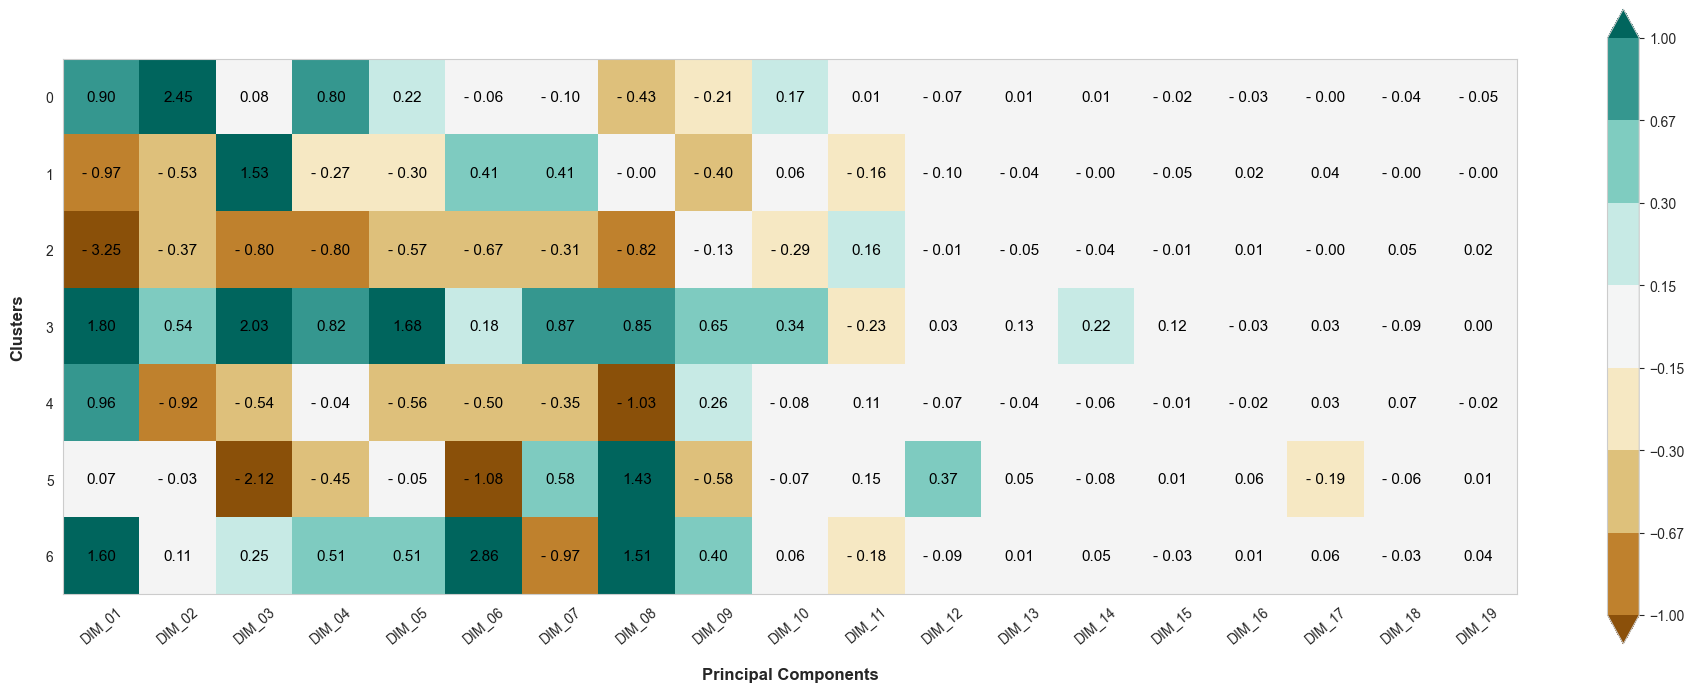

In [71]:
# 比较聚类均值与全局均值的差异，并可视化。
# Principal Components 主成分
# Clusters 聚类（簇）
cl.plot_cluster_means_to_global_means_comparison(xlabel='Principal Components', ylabel='Clusters', 
                                                 levels=[-1, -0.67, -0.3, -0.15, 0.15, 0.3, 0.67, 1])

#### 3.2.2. External variables 外部变量

Note that for external variables we normalize variables to the 0-1 scale in order to make fair comparisons.

注意，对于外部变量，我们将变量标准化到0-1范围内，以便进行公平的比较。


In [72]:
mms = MinMaxScaler()

In [73]:
# 对外部变量进行标准化后，比较聚类均值与全局均值。
cl.compare_cluster_means_to_global_means(pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel))
cl.compare_cluster_means_to_global_means().to_csv('data_MAC/data_澳门_modified_比较聚类内均值与全局均值的差异.csv', index=False)
print("已完成，比较聚类内均值与全局均值的差异，结果保存。")

已完成，比较聚类内均值与全局均值的差异，结果保存。


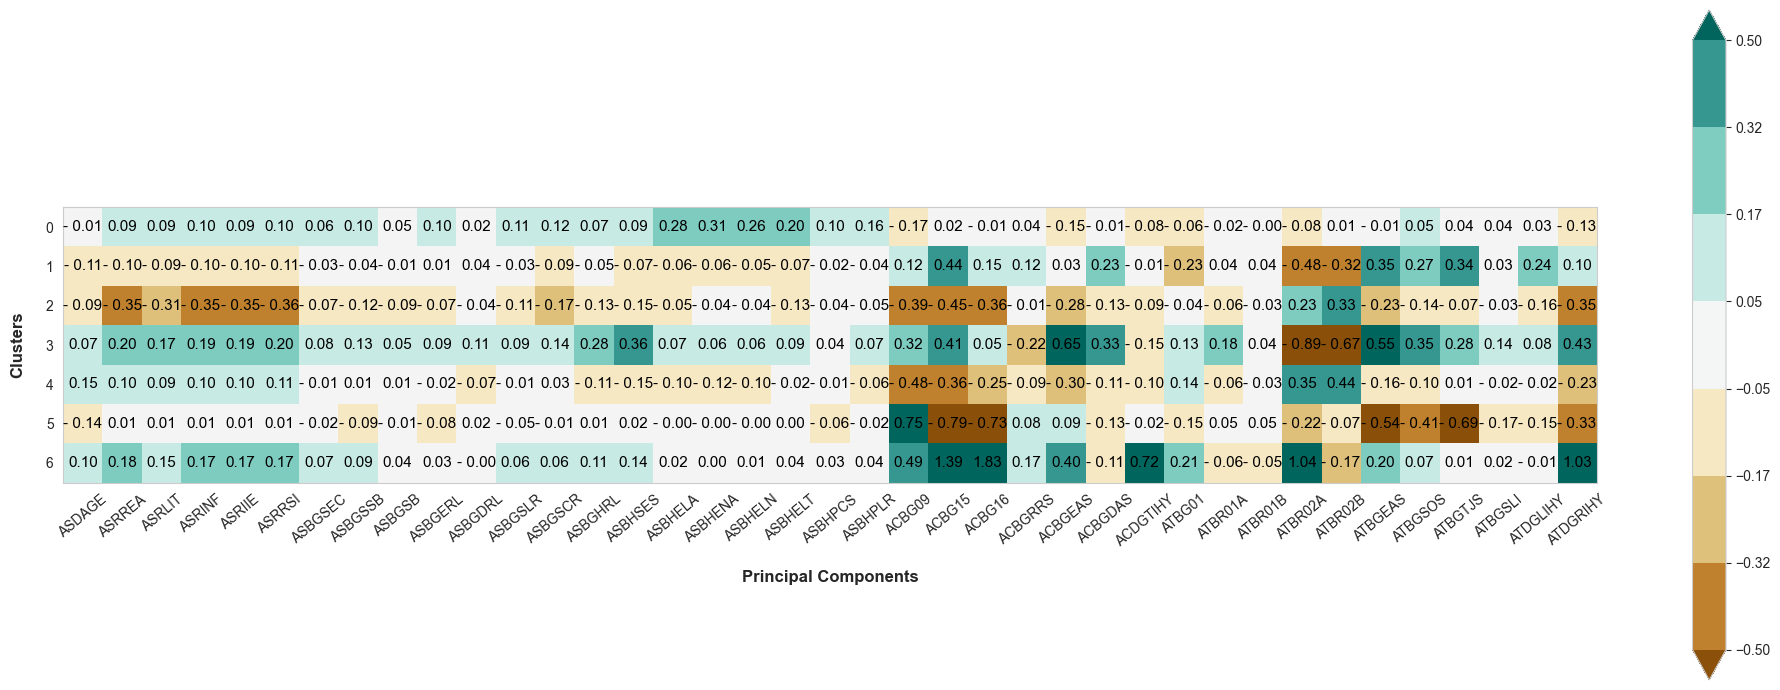

In [74]:
# Principal Components 主成分
# Clusters 聚类（簇）
# 对外部变量（筛选出来的数值变量）比较聚类均值与全局均值。
cl.plot_cluster_means_to_global_means_comparison(df_original=pd.DataFrame(mms.fit_transform(df_original[num_vars_sel]), columns=num_vars_sel), 
                                                 xlabel='Principal Components', ylabel='Clusters', use_weights=True)

### 3.3. Significance tests 显著性测试

In [75]:
# ANOVA tests for internal variables 内部变量的 ANOVA 测试
# 对内部变量进行 ANOVA 测试，分析聚类之间的显著性差异。
cl.anova_tests(cluster_filter=[1, 2], vars_test=['dim_01', 'dim_05', 'dim_08'])

var_name     df    sum_sq   mean_sq        F  PR(>F)
0   dim_01 1.0000 1724.4057 1724.4057 875.0480  0.0000
1   dim_05 1.0000   23.5791   23.5791  14.2139  0.0002
2   dim_08 1.0000  220.6437  220.6437 198.7845  0.0000

In [76]:
cl.anova_tests(cluster_filter=[1, 2], vars_test=['dim_02', 'dim_03'])

var_name     df    sum_sq   mean_sq         F  PR(>F)
0   dim_02 1.0000    8.7470    8.7470    4.3677  0.0368
1   dim_03 1.0000 1806.0448 1806.0448 1560.1776  0.0000

In [77]:
# ANOVA tests for External variables
# ANOVA测试（方差分析）用于外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解

cl.anova_tests(cluster_filter=[1, 2], df_test=df_original[['ATBR10G', 'ATBR09D']])

var_name     df   sum_sq  mean_sq        F  PR(>F)
0  ATBR10G 1.0000 168.3726 168.3726 380.2832  0.0000
1  ATBR09D 1.0000 121.5279 121.5279 297.4256  0.0000

In [78]:
# 分类变量
# 性别
cl.chi2_test(df_original['ITSEX'])

{'chi2': np.float64(15.483083612722293),
 'p': np.float64(0.016814491101965597),
 'dof': 6}

In [79]:
# 分类变量
# 阅读基准
cl.chi2_test(df_original['ASRIBM'])

{'chi2': np.float64(2828.2401032712314), 'p': np.float64(0.0), 'dof': 24}

In [80]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.chi2_test(df_original['ATDGEAS'])

{'chi2': np.float64(1755.8635996524042), 'p': np.float64(0.0), 'dof': 12}

### 3.4. Distribution comparisons (visualizations) for numerical variables
数值变量的分布比较（可视化）


#### 3.4.1. Internal variables 内部变量

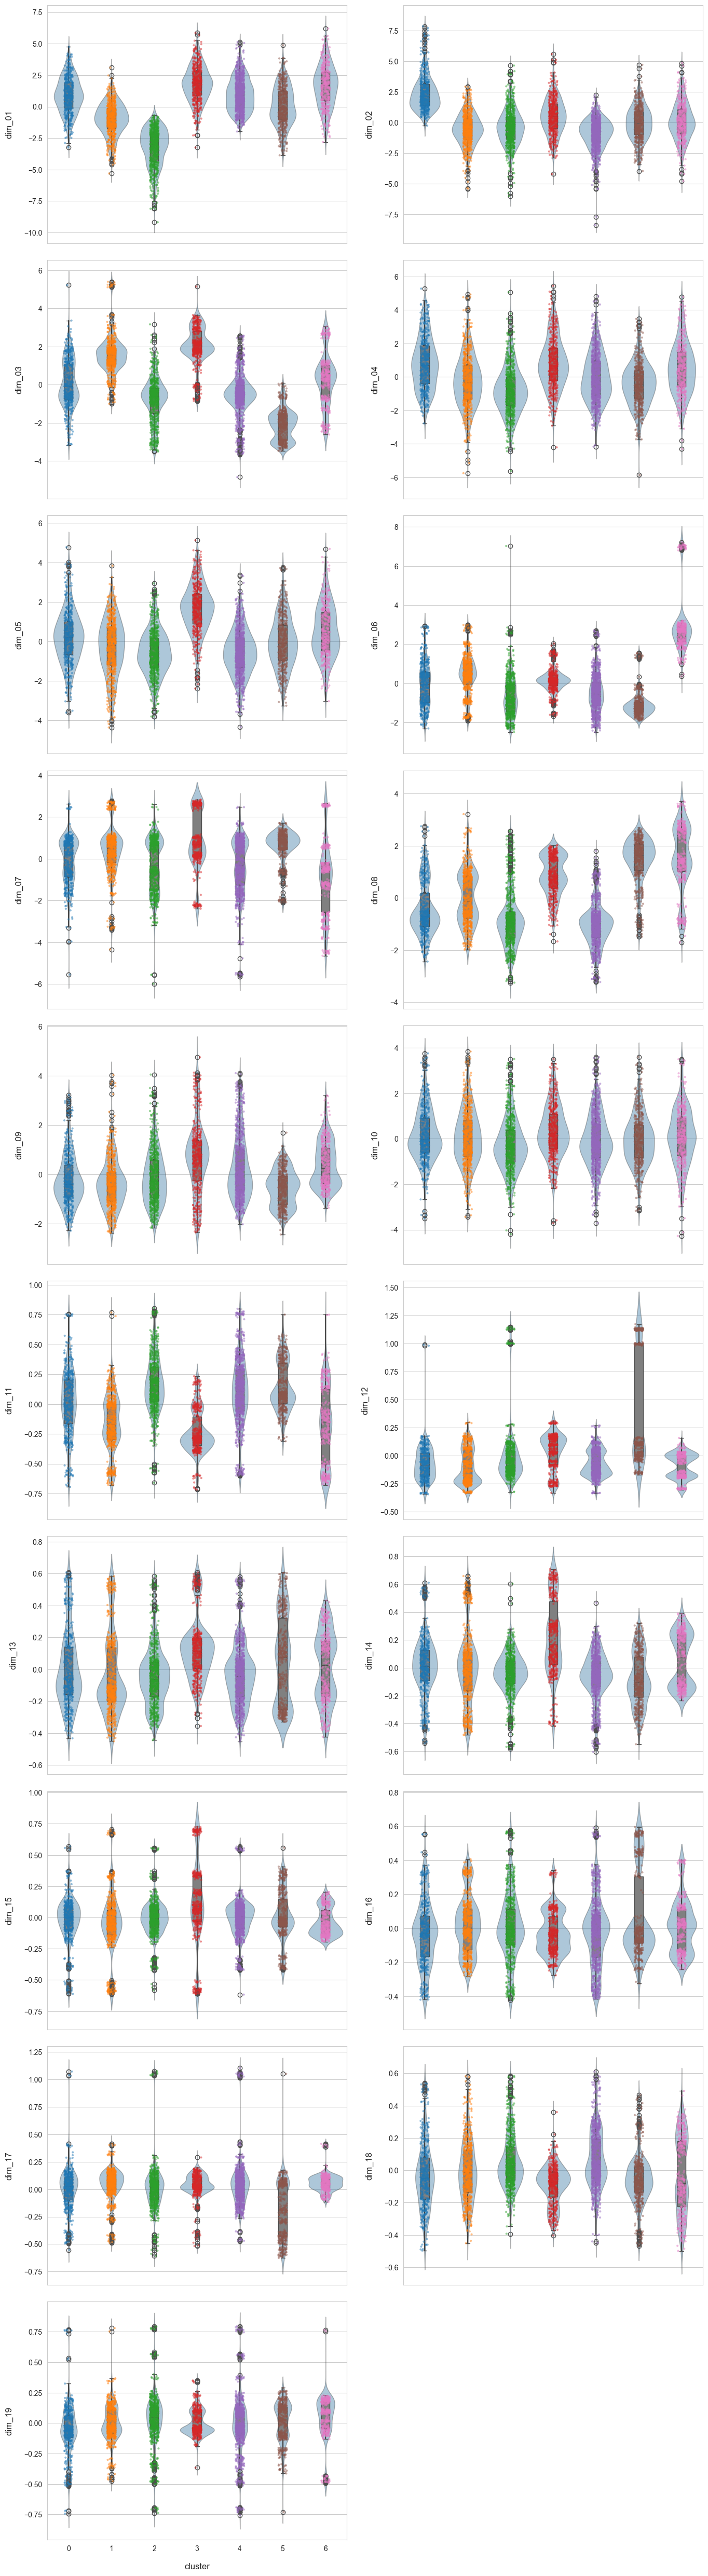

In [81]:
# Internal variables 内部变量 
# 比较降维后数值变量在各聚类中的分布的生成
cl.plot_distribution_comparison_by_cluster()

#### 3.4.2. External variables 外部变量

已完成部分比较原始数值变量在各聚类中的分布的生成。


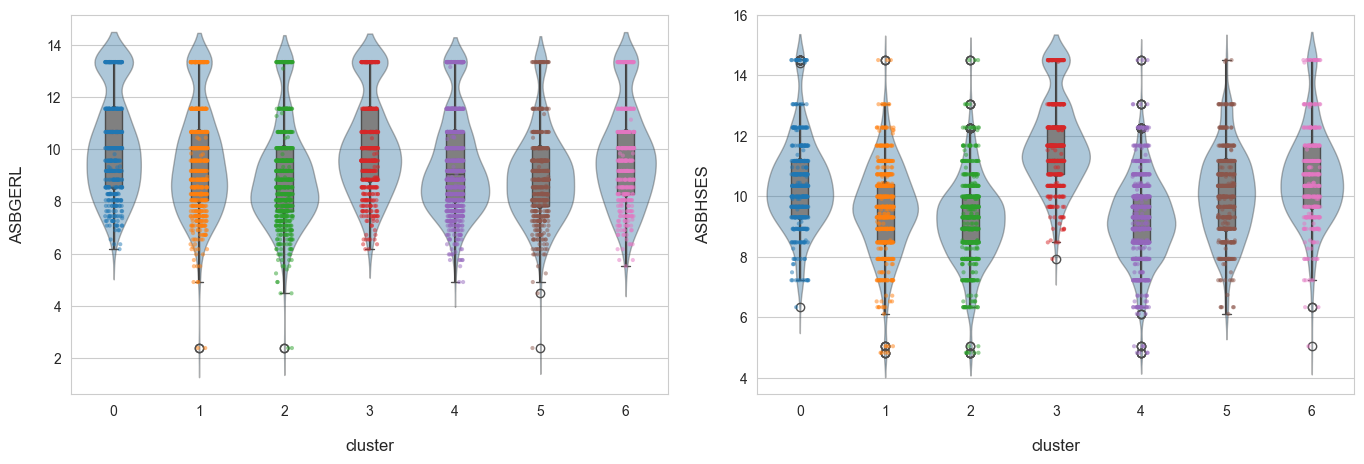

In [82]:
# External variables 外部变量
# ASBGERL	STUDENTS ENGAGED IN READING LESSONS/SCL	学生参与阅读课程/量表
# ASBHSES	HOME SOCIOECONOMIC STATUS/SCL	家庭社会经济地位/量表
# 比较部分原始数值变量在各聚类中的分布
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ASBGERL', 'ASBHSES']])
                                        #    output_path=os.path.join("img_MAC", "部分_比较原始数值变量在各聚类中的分布clustering_distribution_comparison.jpg"))
print("已完成部分比较原始数值变量在各聚类中的分布的生成。")
# cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10G', 'ATBR09D']])

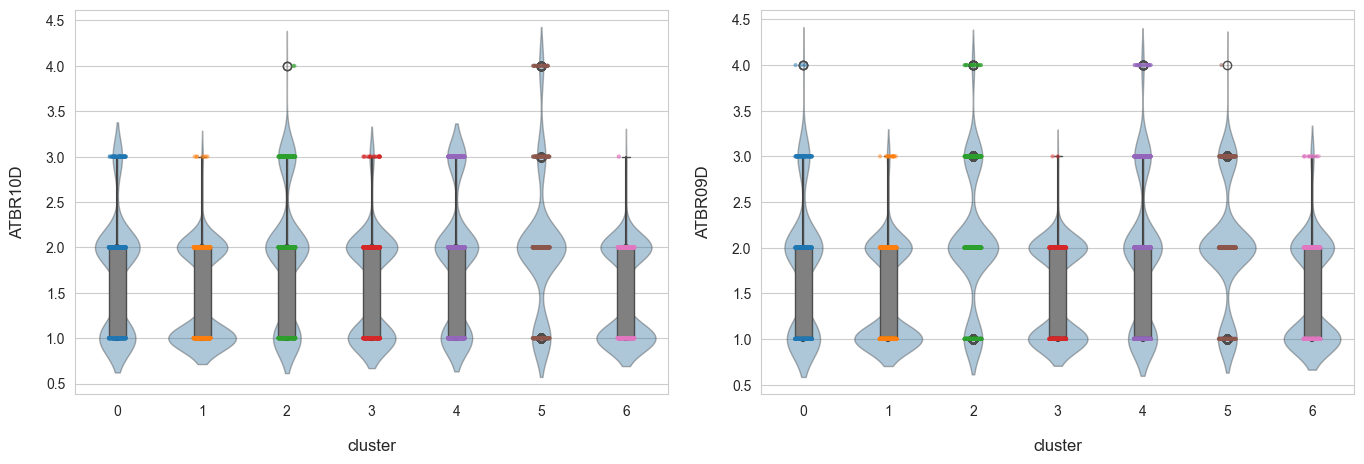

In [83]:
# External variables 外部变量
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']])

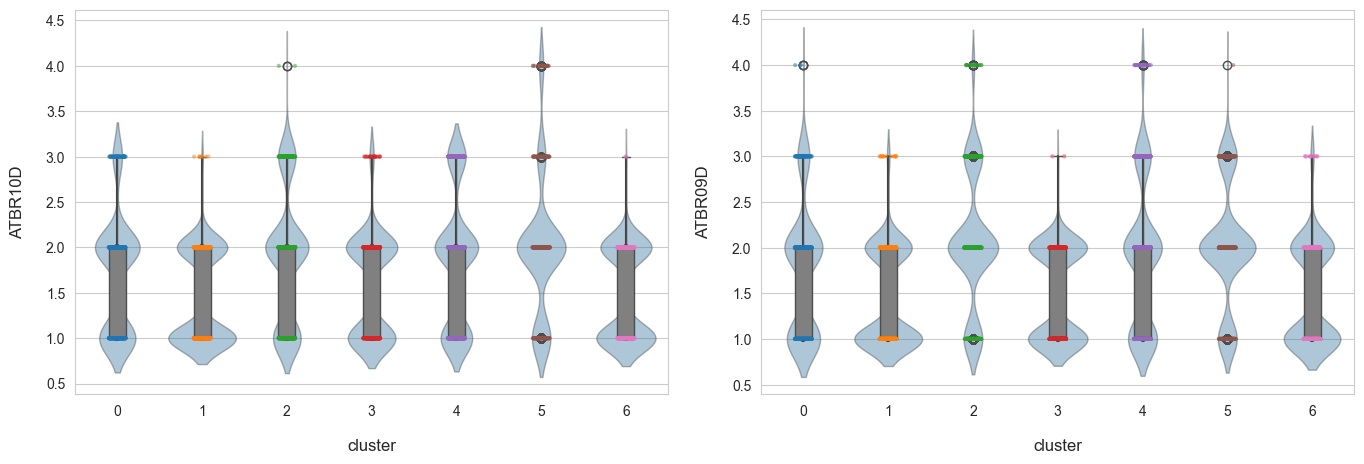

In [84]:
cl.plot_distribution_comparison_by_cluster(df_ext=df_original[['ATBR10D', 'ATBR09D']]) #, output_path='PATH.jpg')

### 3.5. 2-Dimensional plots for numerical variables 2D 数值变量的可视化

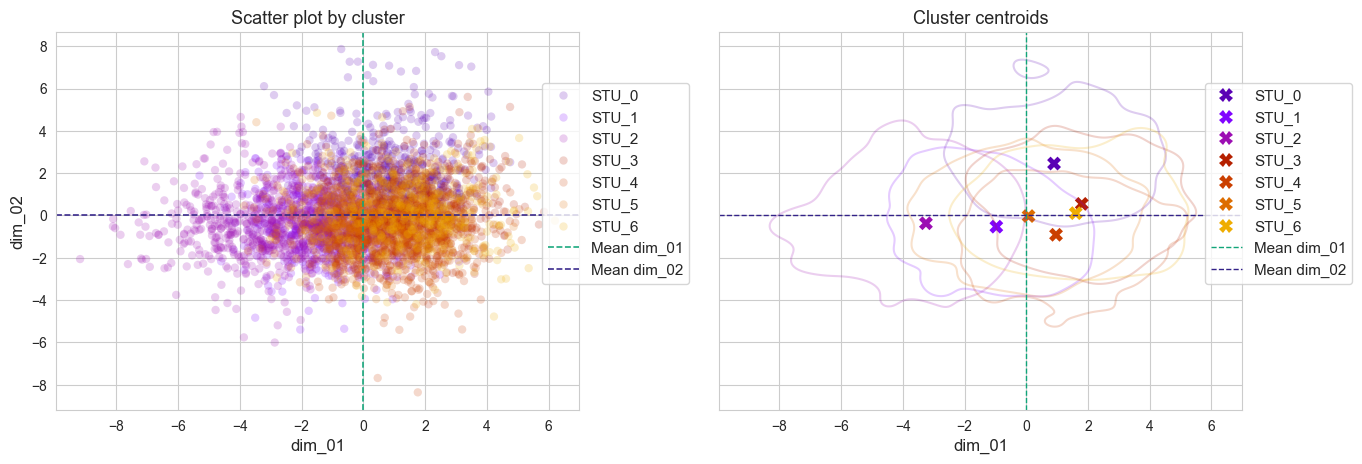

In [85]:
# Internal variables 内部变量
cl.plot_clusters_2D('dim_01', 'dim_02', style_kwargs=dict(kdeplot=True, alpha=0.2)) #, output_path='PATH.jpg')

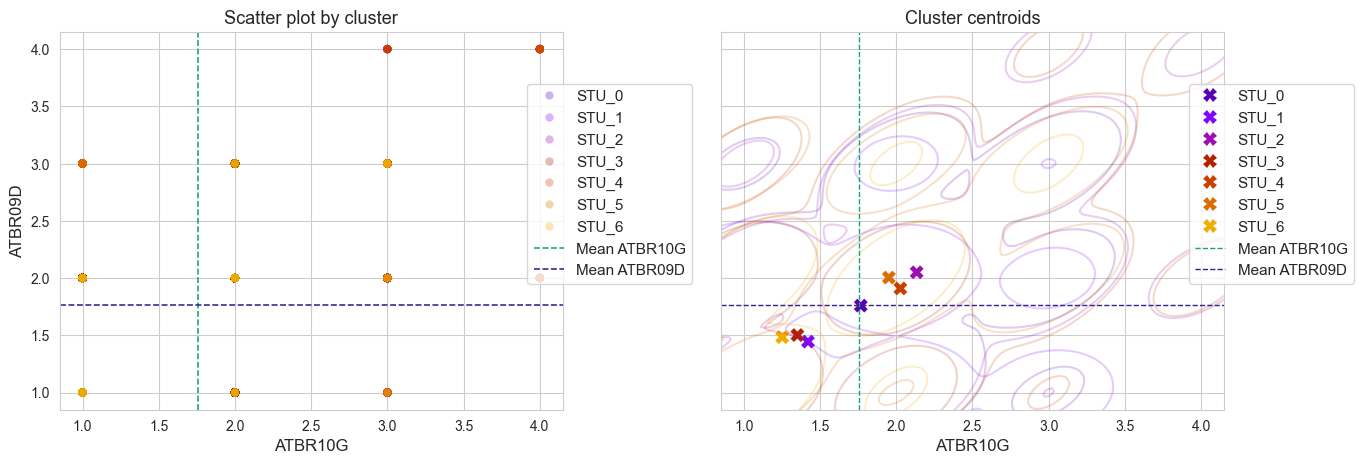

In [86]:
#External Variables 外部变量
# ATBR10G：阅读\发展策略\概括
# ATBR09D：阅读\多久鼓励\发展理解
cl.plot_clusters_2D(df_original['ATBR10G'], df_original['ATBR09D'])

### 3.6. Distribution comparisons (visualization) for categorical variables 

分类变量的分布比较（可视化）

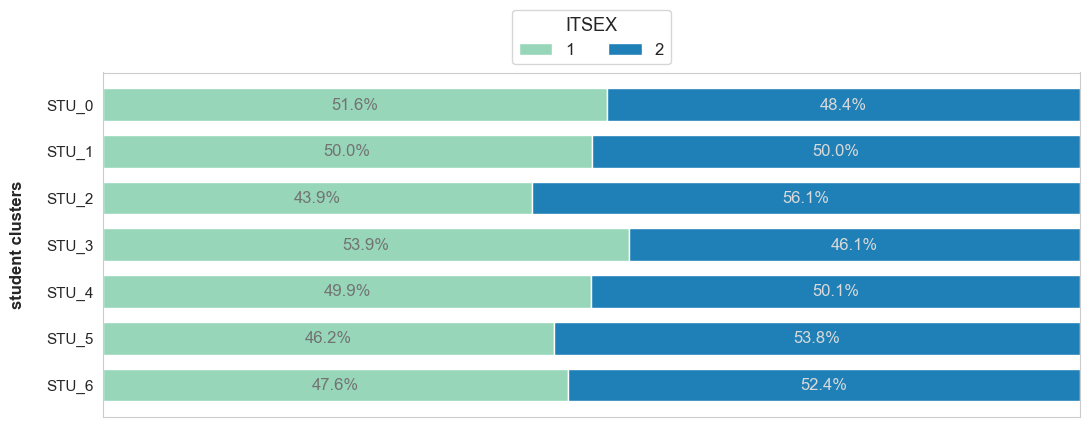

In [87]:
# 分类变量的分布可视化
cl.plot_cat_distribution_by_cluster(df_original['ITSEX'], cat_label='ITSEX', cluster_label='student clusters')

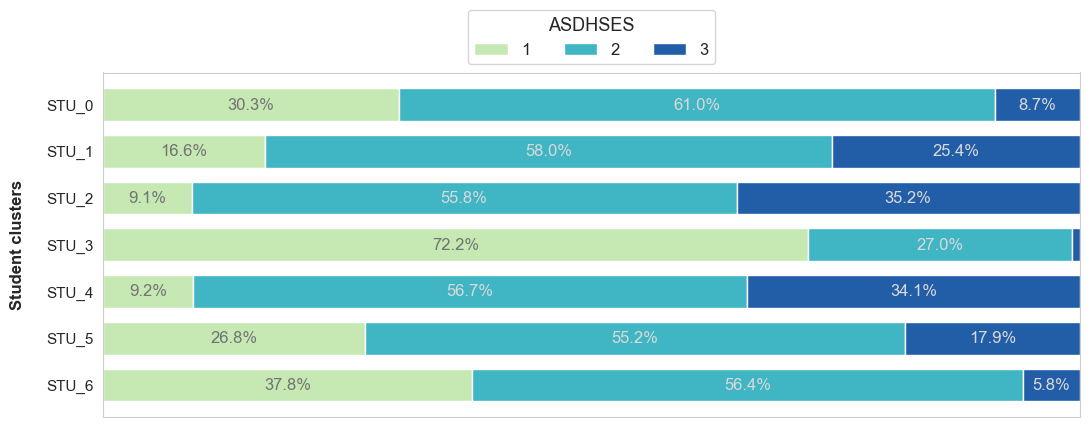

In [88]:
# ASDHSES	HOME SOCIOECONOMIC STATUS/IDX	家庭社会经济地位/指数
cl.plot_cat_distribution_by_cluster(df_original['ASDHSES'], cat_label='ASDHSES', cluster_label='Student clusters')

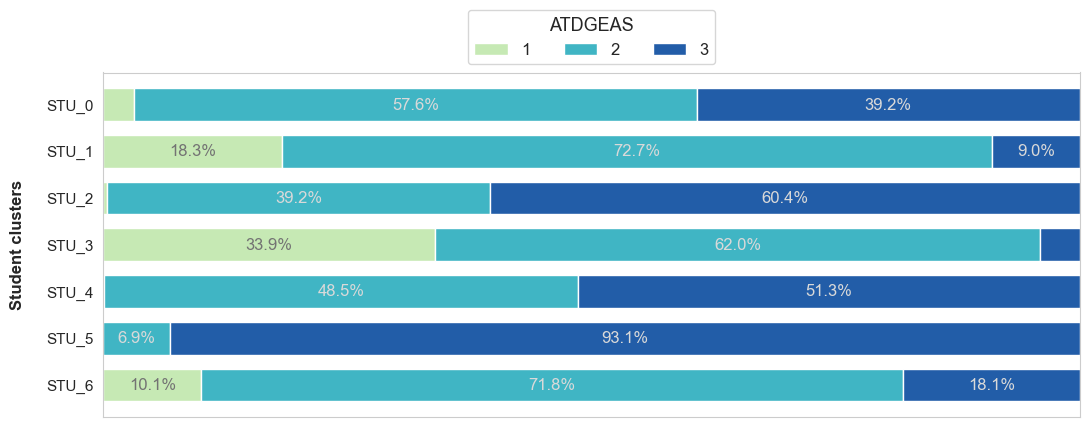

In [89]:
# ATDGEAS 学校强调学术成功-教师/指数
cl.plot_cat_distribution_by_cluster(df_original['ATDGEAS'], cat_label='ATDGEAS', cluster_label='Student clusters')

## Export results 导出结果

Export results: 导出结果
- One data set with the clusters associated to the extracted components;
- 一个数据集，其中包含与提取的成分相关的聚类。

- Another one with the clusters associated to the original data.
- 另一个数据集，其中包含与原始数据相关的聚类。


In [90]:
cl.df.to_csv('data_MAC/data_澳门_modified_preprocessed_dim_red_clustered_output.csv', index=False)

In [91]:
# 一次性添加两列
new_columns = pd.DataFrame({
    "cluster": cl.df["cluster"].values,
    "cluster_cat": cl.df["cluster_cat"].values
})
df_original = pd.concat([df_original, new_columns], axis=1)

# df_original['cluster'] = cl.df['cluster'].values
# df_original['cluster_cat'] = cl.df['cluster_cat'].values
df_original.to_csv('data_MAC/data_澳门_modified_preprocessed_clustered_output.csv', index=False)

## Reproducibility 可重复性

In [92]:
df_ref = pd.read_csv('data_MAC/data_澳门_modified_preprocessed_dim_red_clustered_output.csv')

print('Diff', (df_ref['cluster'] != cl.df['cluster']).sum())

Diff 0
